# Understanding Data Analysis and EDA

The aim of this notebook is to have a good understanding of how data analysis works and basic fundamentals of Data Analysis. 

## Why Do We Need Data Analysis?

Data analysis is important to explore data in a meaningful way. 



For business understanding of data  Data in itself is merely facts and figures. Data analysis organises, interprets, structures and presents the data into useful information that provides context for the data. This context can then be used by decision-makers to take action with the aim of enhancing productivity and business gain.

Here are the few points we need to have as an objective of Data Anaalysis:

* Understand business direction and objective of the data
* Explore the meaning behind the numbers and figures in data
* Analyse the causes of certain events based on data findings
* Present technical insights using easy-to-understand language
* Predict the outcome of certain disasters based on given dataset



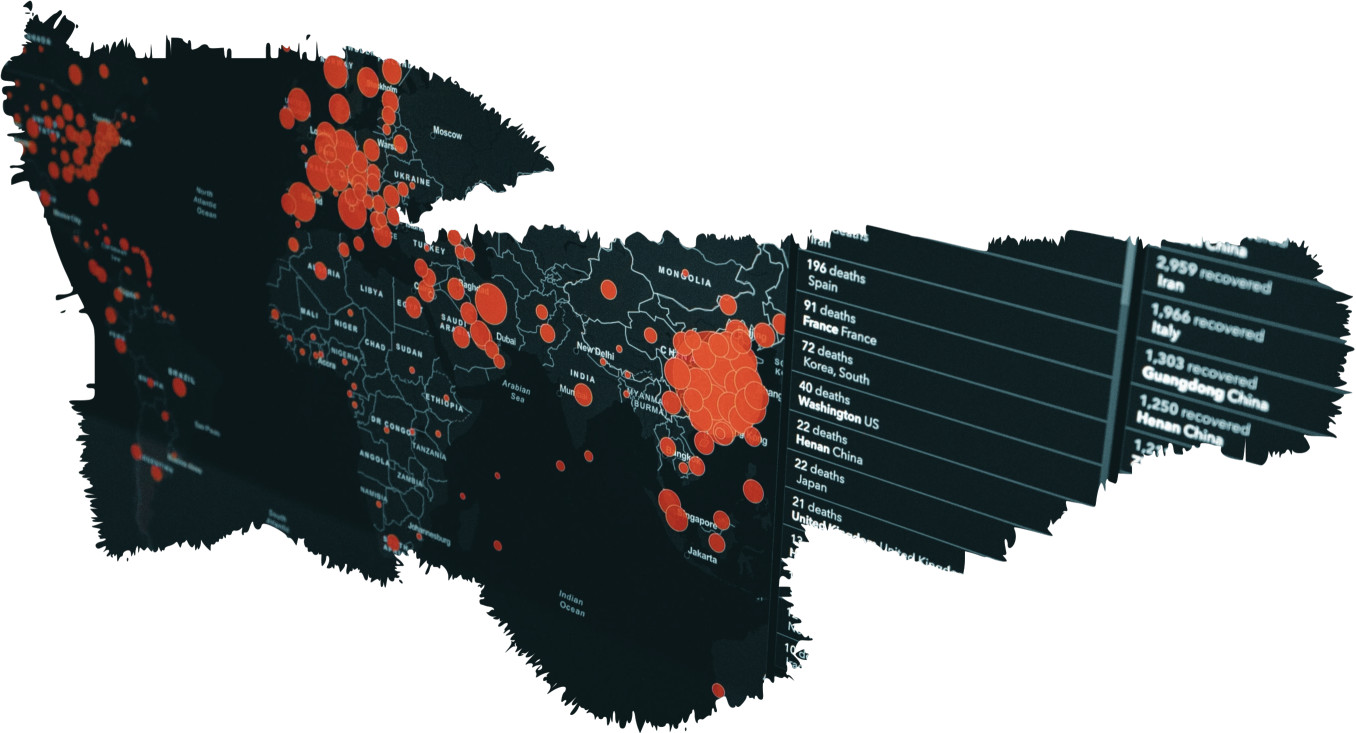

## Let's get into the real problem here:

As part of intorduction let's understand what data we have and what is the challenge we are going to solve.

We'll be trying to predict a classification- survival or deceased. Let's begin our understanding of implementing Logistic Regression in Python for classification.

We'll use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning not shown in this lecture notebook.

Please upvote the notebook if it helps you.

In [1]:
# Load in our libraries
import pandas as pd
import numpy as np
import re
import sklearn
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import warnings
warnings.filterwarnings('ignore')

# Going to use these 5 base models for the stacking
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


## Loading teh Train and Test Data from Titanic Dataset

In [2]:
#Train Test Dataset Import

train_df = pd.read_csv('../input/titanic/train.csv')
test_df = pd.read_csv('../input/titanic/test.csv')
combine = [train_df, test_df]


## Let's do some interesting EDA analysis

### Missing Data

### There are several strategies which can be applied to handle missing data to make the Machine Learning/Statistical Model.

* Try to obtain the missing data
* Educated Guessing
* Discard Data

        1) list-wise (Complete-case analysis — CCA) deletion
        2) Pairwise (available case analysis — ACA) Deletion

* Dropping Variables
Retain All Data

            1) Mean, Median and Mode

            2) Last Observation Carried Forward (LOCF)

            3) Next Observation Carried Backward (NOCB)

            4) Linear Interpolation

            5) Common-Point Imputation

            6) Adding a category to capture NA

            7) Frequent category imputation

            8) Arbitrary Value Imputation

            9) Adding a variable to capture NA

            10) Random Sampling Imputation
    
    
* Multiple Imputation

In [3]:
train_df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

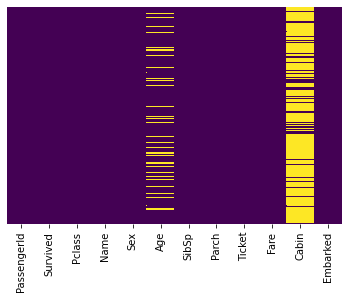

In [4]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

The heatmap shown above has yello line bar displaying how much data is missing for which column. The Age column has around 20% of the data is missing. 
The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. 
Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

## Explain the data with Visualization 

In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


What is the distribution of categorical features?

*    Names are unique across the dataset (count=unique=891)
*    Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
*    Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
*    Embarked takes three possible values. S port used by most passengers (top=S)
*    Ticket feature has high ratio (22%) of duplicate values (unique=681).



### Does Female passengers tend to survice more than Male?

Let's have a look at the below bar plots agins this two fields [ Male and Female ]


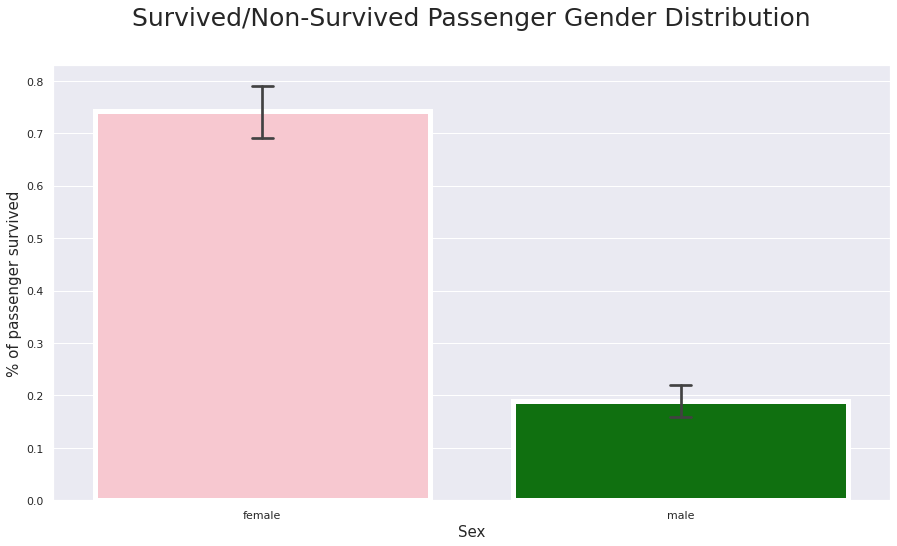

In [6]:
import seaborn as sns
pal = {'male':"green", 'female':"Pink"}
sns.set(style="darkgrid")
plt.subplots(figsize = (15,8))
ax = sns.barplot(x = "Sex", 
                 y = "Survived", 
                 data=train_df, 
                 palette = pal,
                 linewidth=5,
                 order = ['female','male'],
                 capsize = .05,

                )

plt.title("Survived/Non-Survived Passenger Gender Distribution", fontsize = 25,loc = 'center', pad = 40)
plt.ylabel("% of passenger survived", fontsize = 15, )
plt.xlabel("Sex",fontsize = 15);



###  Let's see the survival rate based on Pclass

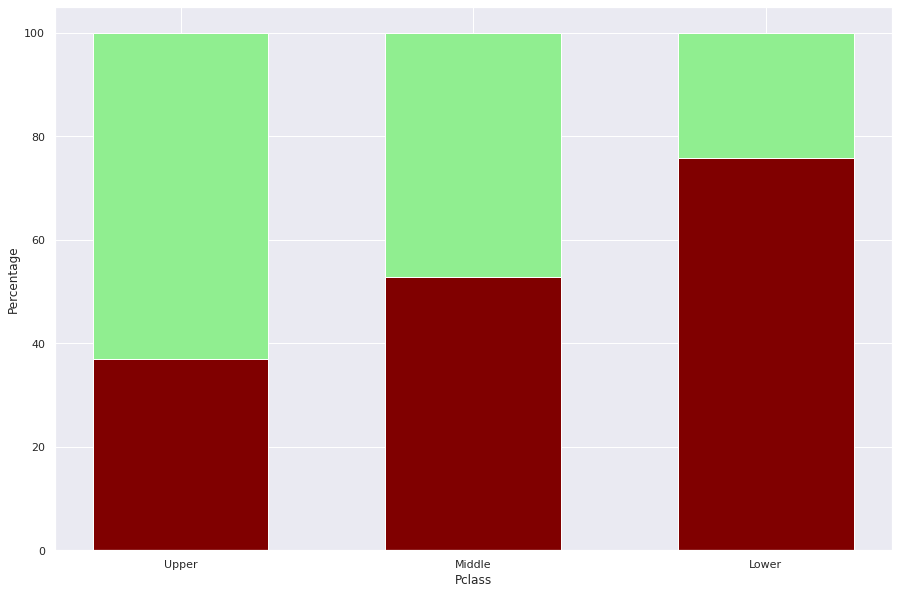

In [7]:


temp = train_df[['Pclass', 'Survived', 'PassengerId']].groupby(['Pclass', 'Survived']).count().reset_index()
temp_df = pd.pivot_table(temp, values = 'PassengerId', index = 'Pclass',columns = 'Survived')
names = ['No', 'Yes']
temp_df.columns = names
r = [0,1,2]
totals = [i+j for i, j in zip(temp_df['No'], temp_df['Yes'])]
No_s = [i / j * 100 for i,j in zip(temp_df['No'], totals)]
Yes_s = [i / j * 100 for i,j in zip(temp_df['Yes'], totals)]
## Plotting
plt.subplots(figsize = (15,10))
barWidth = 0.60
names = ('Upper', 'Middle', 'Lower')
# Create green Bars
plt.bar(r, No_s, color='maroon', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, Yes_s, bottom=No_s, color='lightgreen', edgecolor='white', width=barWidth)

 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("Pclass")
plt.ylabel('Percentage')
 
# Show graphic
plt.show()

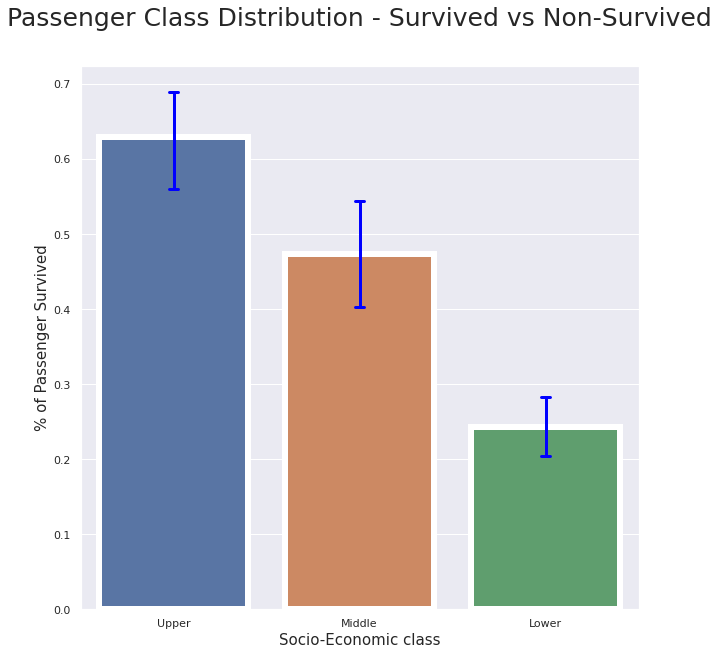

In [8]:
plt.subplots(figsize = (10,10))
sns.barplot(x = "Pclass", 
            y = "Survived", 
            data=train_df, 
            linewidth=6,
            capsize = .05,
            errcolor='blue',
            errwidth = 3
            

           )
plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 25, pad=40)
plt.xlabel("Socio-Economic class", fontsize = 15);
plt.ylabel("% of Passenger Survived", fontsize = 15);
names = ['Upper', 'Middle', 'Lower']
#val = sorted(train.Pclass.unique())
val = [0,1,2] ## this is just a temporary trick to get the label right. 
plt.xticks(val, names);

It looks like ...

    ~ 63% first class passenger survived titanic tragedy, while
    ~ 48% second class and
    ~ only 24% third class passenger survived.


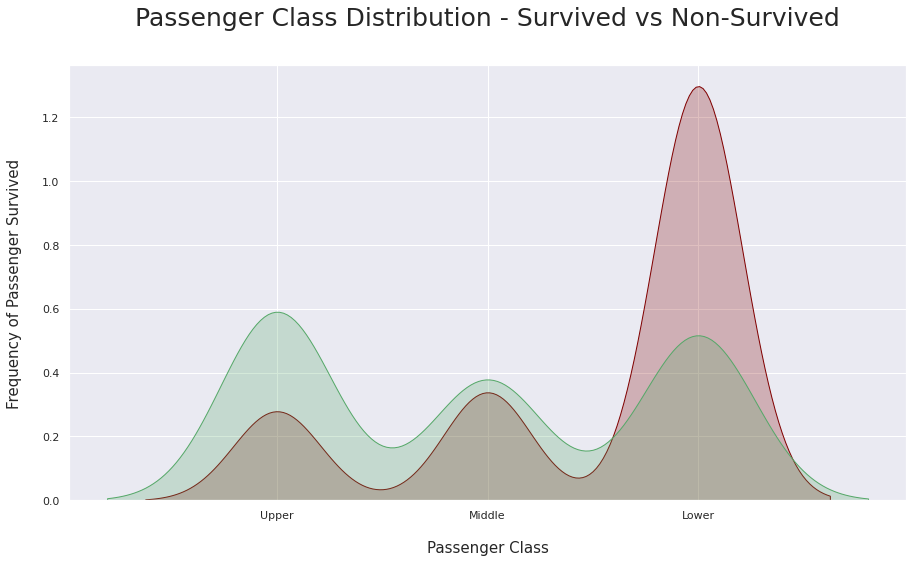

In [9]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
## I have included to different ways to code a plot below, choose the one that suites you. 
ax=sns.kdeplot(train_df.Pclass[train_df.Survived == 0] , 
               color='maroon',
               shade=True,
               label='not survived')
ax=sns.kdeplot(train_df.loc[(train_df['Survived'] == 1),'Pclass'] , 
               color='g',
               shade=True, 
               label='survived', 
              )
plt.title('Passenger Class Distribution - Survived vs Non-Survived', fontsize = 25, pad = 40)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15, labelpad = 20)
plt.xlabel("Passenger Class", fontsize = 15,labelpad =20)
## Converting xticks into words for better understanding
labels = ['Upper', 'Middle', 'Lower']
plt.xticks(sorted(train_df.Pclass.unique()), labels);

### Fare and Survived

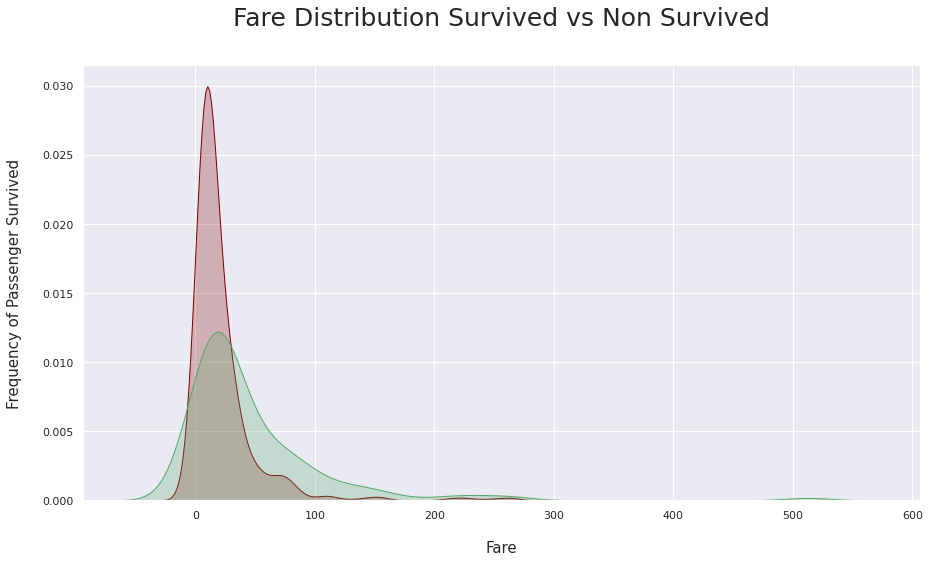

In [10]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(train_df.loc[(train_df['Survived'] == 0),'Fare'] , color='maroon',shade=True,label='not survived')
ax=sns.kdeplot(train_df.loc[(train_df['Survived'] == 1),'Fare'] , color='g',shade=True, label='survived')
plt.title('Fare Distribution Survived vs Non Survived', fontsize = 25, pad = 40)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15, labelpad = 20)
plt.xlabel("Fare", fontsize = 15, labelpad = 20);

### Age and Survival rate

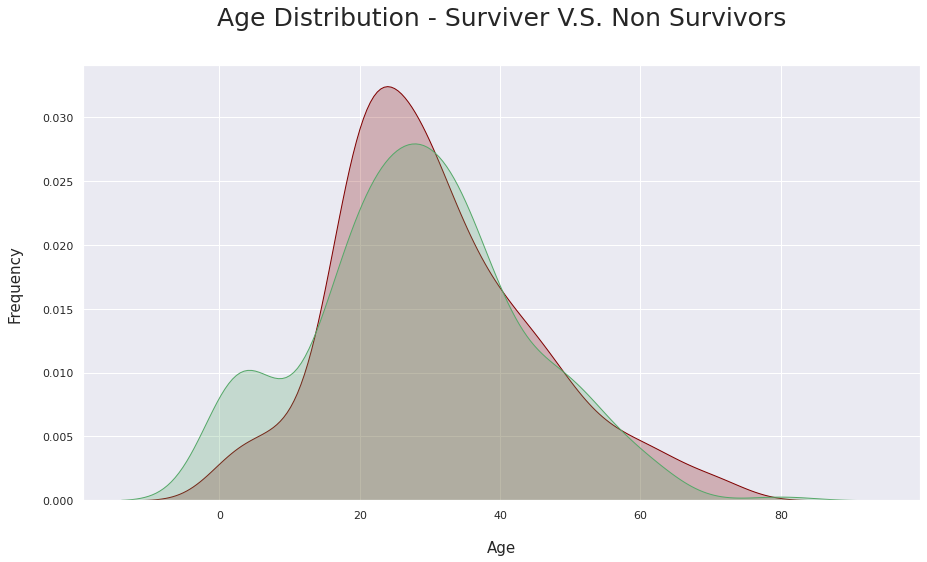

In [11]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(train_df.loc[(train_df['Survived'] == 0),'Age'] , color='maroon',shade=True,label='not survived')
ax=sns.kdeplot(train_df.loc[(train_df['Survived'] == 1),'Age'] , color='g',shade=True, label='survived')
plt.title('Age Distribution - Surviver V.S. Non Survivors', fontsize = 25, pad = 40)
plt.xlabel("Age", fontsize = 15, labelpad = 20)
plt.ylabel('Frequency', fontsize = 15, labelpad= 20);

## Combined Feature Relations

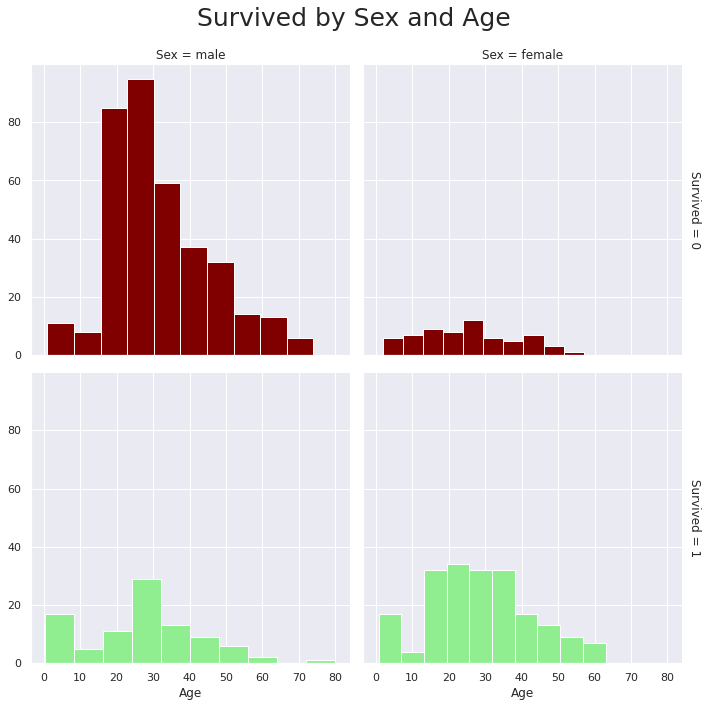

In [12]:
pal = {1:"lightgreen", 0:"maroon"}
g = sns.FacetGrid(train_df,size=5, col="Sex", row="Survived", margin_titles=True, hue = "Survived",
                  palette=pal)
g = g.map(plt.hist, "Age", edgecolor = 'white');
g.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)


Facetgrid is a great way to visualize multiple variables and their relationships at once. From the chart show earlier we have a intuation that female passengers had better prority than males during the tragedy. However, from this facet grid, we can also understand which age range groups survived more than others or were not so lucky

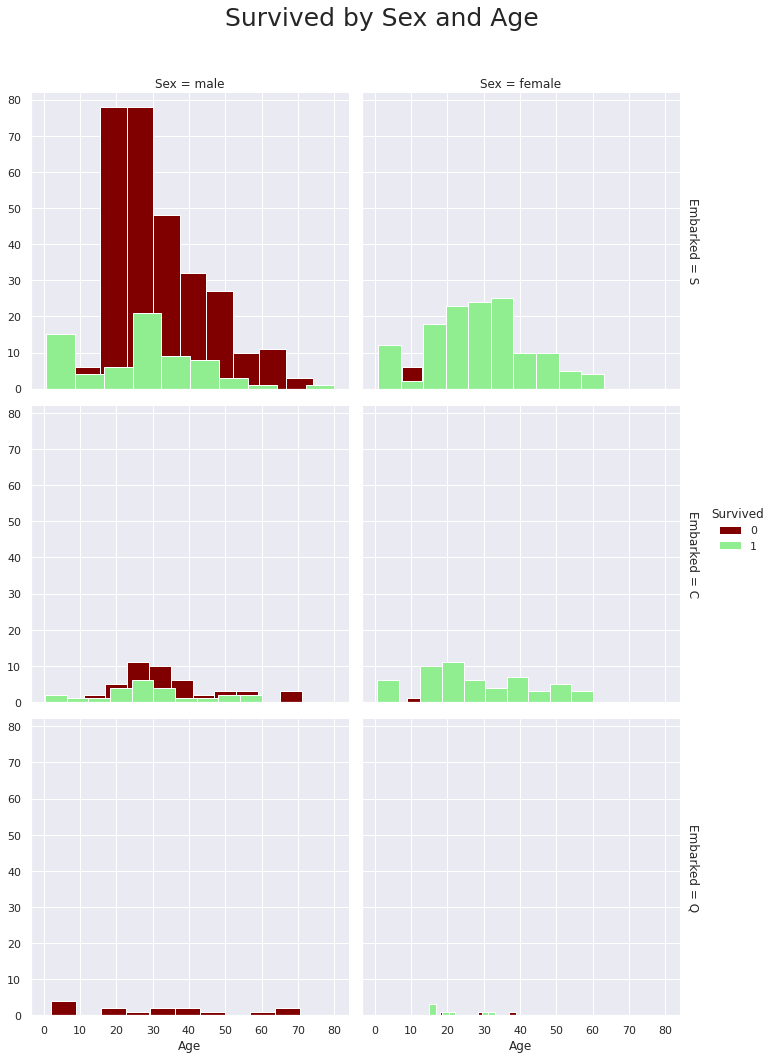

In [13]:
g = sns.FacetGrid(train_df,size=5, col="Sex", row="Embarked", margin_titles=True, hue = "Survived",
                  palette = pal
                  )
g = g.map(plt.hist, "Age", edgecolor = 'white').add_legend();
g.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)

This is another compelling facet grid illustrating four features relationship at once. They are Embarked, Age, Survived & Sex.

    The color illustrates passengers survival status(green represents survived, maroon represents not survived)
    The column represents Sex(left being male, right stands for female)
    The row represents Embarked(from top to bottom: S, C, Q)



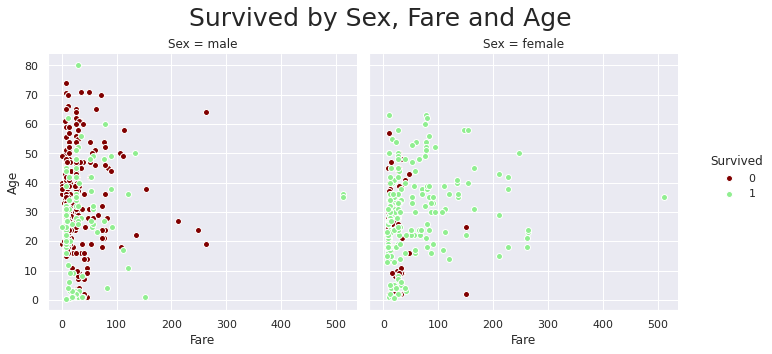

In [14]:
g = sns.FacetGrid(train_df, size=5,hue="Survived", col ="Sex", margin_titles=True,
                palette=pal,)
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
g.fig.suptitle("Survived by Sex, Fare and Age", size = 25)
plt.subplots_adjust(top=0.85)

### This facet grid unveils a couple of interesting insights. Let's find out.

The grid above clearly demonstrates the three outliers with Fare of over $500. At this point, I think we are quite confident that these outliers should be deleted.

Most of the passengers were with in the Fare range of $100.



## Data Cleaning

We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class. For example:

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

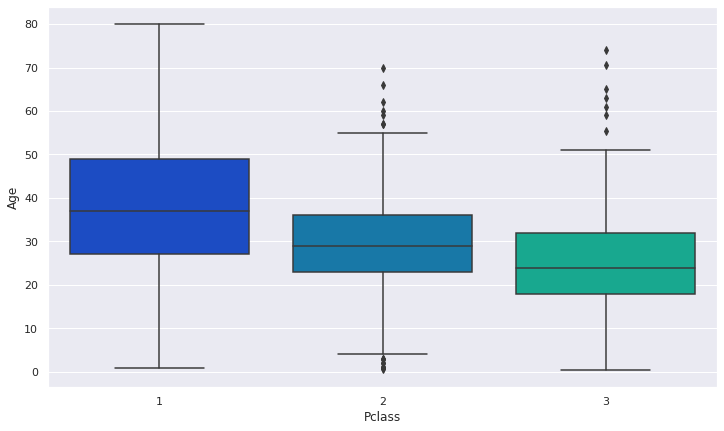

In [15]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train_df,palette='winter')

In [16]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [17]:
train_df['Age'] = train_df[['Age','Pclass']].apply(impute_age,axis=1)

We are replacing the null values for the age column

<AxesSubplot:>

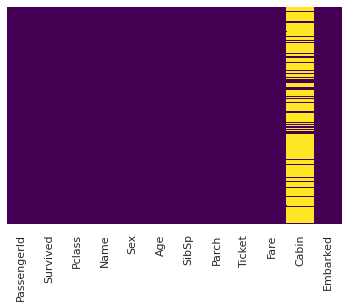

In [18]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

For the cabin column it's better to drop the column as tere are so many null values. It needs a huge amount of feature engineering even if we wanna do that.


In [19]:
train_df.drop('Cabin',axis=1,inplace=True)

In [20]:
train_df.dropna(inplace=True)

<AxesSubplot:>

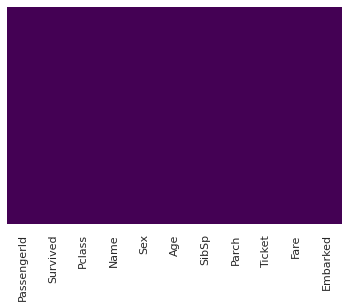

In [21]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Now we have no null values in the train data

### Converting Categorical Features

In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [23]:
pd.get_dummies(train_df['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [24]:
sex = pd.get_dummies(train_df['Sex'],drop_first=True)
embark = pd.get_dummies(train_df['Embarked'],drop_first=True)

In [25]:
train_df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [26]:
train_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [27]:
train_df = pd.concat([train_df,sex,embark],axis=1)

In [28]:
train_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


## Building Model

In [29]:
train_df.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


## Train Test Split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(train_df.drop('Survived',axis=1), 
                                                    train_df['Survived'], test_size=0.30, 
                                                    random_state=101)

### Let's use few algorithms to test the accuracy

In [32]:
# import LogisticRegression model in python. 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score

## call on the model object
logreg = LogisticRegression(solver='liblinear',
                            penalty= 'l1',random_state = 42
                                
                            )

## fit the model with "train_x" and "train_y"
logreg.fit(X_train,y_train)

## Once the model is trained we want to find out how well the model is performing, so we test the model. 
## we use "X_test" portion of the data(this data was not used to fit the model) to predict model outcome. 
y_pred = logreg.predict(X_test)

## Once predicted we save that outcome in "y_pred" variable.
## Then we compare the predicted value( "y_pred") and actual value("test_y") to see how well our model is performing. 

logg_acc = round(logreg.score(X_train, y_train) * 100, 2)
logg_acc

80.23

In [33]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

79.42

## Evaluation

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
# printing confision matrix
pd.DataFrame(confusion_matrix(y_test,y_pred),\
            columns=["Predicted Not-Survived", "Predicted Survived"],\
            index=["Not-Survived","Survived"] )



,Predicted Not-Survived,Predicted Survived
Not-Survived,144,19
Survived,33,71


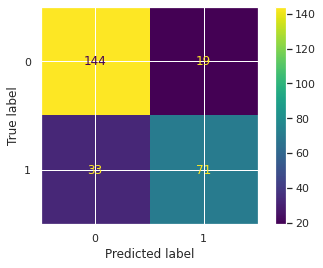

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = gaussian.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       163
           1       0.79      0.68      0.73       104

    accuracy                           0.81       267
   macro avg       0.80      0.78      0.79       267
weighted avg       0.80      0.81      0.80       267



### AUC & ROC Curve

0.8673902784332231


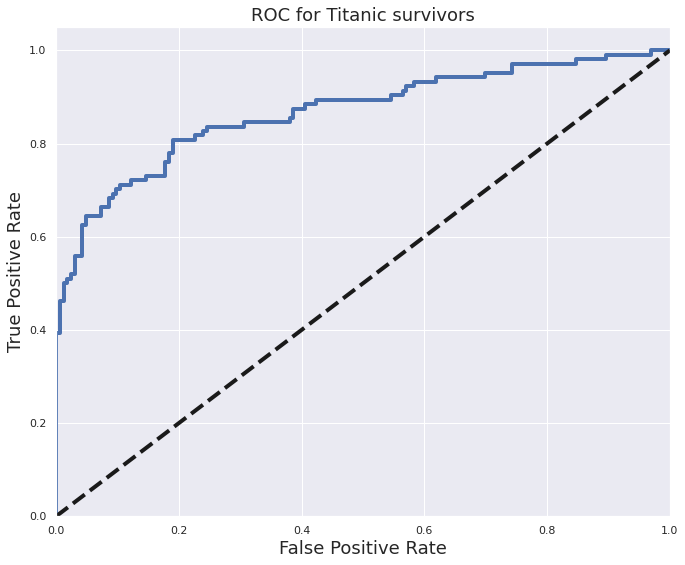

In [37]:
from sklearn.metrics import roc_curve, auc
#plt.style.use('seaborn-pastel')
y_score = logreg.decision_function(X_test)

FPR, TPR, _ = roc_curve(y_test, y_score)
ROC_AUC = auc(FPR, TPR)
print (ROC_AUC)

plt.figure(figsize =[11,9])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('ROC for Titanic survivors', fontsize= 18)
plt.show()

### Thanks for going through my kernal. I have kept it as simple as possible and documented the observations! Thanks to the kernel by [Masum](http://https://www.kaggle.com/masumrumi/a-statistical-analysis-ml-workflow-of-titanic) and [Krish ](http://https://github.com/krishnaik06/EDA1/blob/master/EDA.ipynb)